# Project 4: Data Wrangling

In this project, we will be using Python and its libraries to gather data from different sources, access its quality and tidiess, then clean the data before analysis.

The dataset that you will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. 

The goal of this project is to wrangle data from WeRateDogs Twitter's account using Python and document the whole process in a Jupyter Notebook named wrangle_act.ipynb i.e. this notebook. My aim is to wrangle this data for interesting and trustworthy analyses using visualizations.

# Gather

### 1. The WeRateDogs Twitter archive.

In [338]:
import pandas as pd
import numpy as np

In [339]:
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### 2. The tweet image predictions

In [244]:
import requests

In [245]:
data = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
df_image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

In [246]:
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


###  3. Query the Twitter API

In [7]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

In [8]:
consumer_key = 'hidden'
consumer_secret = 'hidden'
access_token = 'hidden'
access_secret = 'hidden'

In [9]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [10]:
tweet_ids = df_twitter_archive.tweet_id.values
len(tweet_ids) 

2356

In [11]:
tweet_ids = df_twitter_archive['tweet_id']
tweet_ids

0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
               ...        
2351    666049248165822465
2352    666044226329800704
2353    666033412701032449
2354    666029285002620928
2355    666020888022790149
Name: tweet_id, Length: 2356, dtype: int64

In [12]:
#list of tweets with errors
error_tweets = []
#list of tweets
tweet_data = []

#start time
start = timer()

for tweet_id in tweet_ids:
    try:
        tweet = api.get_status(tweet_id, tweet_mode= 'extended')._json 
        
        favorites = tweet['favorite_count'] # number of favorites for the tweet
        retweets = tweet['retweet_count'] # number of retweets
        
        tweet_data.append({'tweet_id': int(tweet_id),
                        'favorites': int(favorites),
                        'retweets': int(retweets)})
    except Exception as e:
        print(str(tweet_id)+ " _ " + str(e))
        error_tweets.append(tweet_id)
        
# end time for excution
end = timer()

#printing time for execution
print("Total time taken", end - start)

888202515573088257 _ [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921 _ [{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937 _ [{'code': 144, 'message': 'No status found with that ID.'}]
872261713294495745 _ [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 _ [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 _ [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 _ [{'code': 144, 'message': 'No status found with that ID.'}]
856602993587888130 _ [{'code': 144, 'message': 'No status found with that ID.'}]
851953902622658560 _ [{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705 _ [{'code': 144, 'message': 'No status found with that ID.'}]
844704788403113984 _ [{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648 _ [{'code': 144, 'message': 'No status found with that ID.'}]
837366284874571778 _ [{'code

Rate limit reached. Sleeping for: 662


754011816964026368 _ [{'code': 144, 'message': 'No status found with that ID.'}]
680055455951884288 _ [{'code': 144, 'message': 'No status found with that ID.'}]


Rate limit reached. Sleeping for: 661


Total time taken 1955.092955746


In [14]:
len(tweet_ids)

2356

In [15]:
len(error_tweets)

25

In [16]:
# creating dataframes that contains the variables of interests
df_tweets_json = pd.DataFrame(tweet_data, columns = ['tweet_id', 'favorites', 'retweets'])
# saving the dataFrame to file
df_tweets_json.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)

In [247]:
df_api_data = pd.read_csv('tweet_json.txt', encoding = 'utf-8')

In [248]:
df_api_data.head()

,tweet_id,favorites,retweets
0,892420643555336193,35930,7630
1,892177421306343426,31000,5643
2,891815181378084864,23319,3740
3,891689557279858688,39213,7800
4,891327558926688256,37457,8395


In [249]:
df_api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   tweet_id   2331 non-null   int64
 1   favorites  2331 non-null   int64
 2   retweets   2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


#### We have now finished gathering data.

Here are the three dataframes:
- df_twitter_archive - contains data read from provided csv file twitter-archive-enhanced.csv;
- df_image_predictions - this is the data that read by using requests from tsv file hosted on Udacity server;
- df_api_data - contains data obtained from twitter  using tweepy library.

# Access

### 1. Access twitter-archve-enhanced dataset

In [366]:
df_twitter_archive.sample(30)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747885874...,8,10,a,None,None,None,None
384,826958653328592898,NaN,NaN,2017-02-02 01:01:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Loki. He smiles like Elvis. Ain't noth...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/826958653...,12,10,Loki,doggo,None,None,None
1691,681320187870711809,NaN,NaN,2015-12-28 03:46:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Glacier. He's a very happy pup. Loves ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681320187...,11,10,Glacier,None,None,None,None
1150,726224900189511680,NaN,NaN,2016-04-30 01:41:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I'm getting super heckin frustrated with you a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/726224900...,9,10,None,None,None,None,None
1221,714485234495041536,NaN,NaN,2016-03-28 16:12:09 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Blitz. He screams. 10/10 (vid by @yeaa...,NaN,NaN,NaN,https://vine.co/v/iDrOvVqq0A6,10,10,Blitz,None,None,None,None
897,759047813560868866,NaN,NaN,2016-07-29 15:27:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Spencer. He's part of the Queen's Guar...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/759047813...,11,10,Spencer,None,None,None,None
110,871102520638267392,NaN,NaN,2017-06-03 20:33:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,NaN,NaN,NaN,https://twitter.com/animalcog/status/871075758...,14,10,None,doggo,None,None,None
570,801854953262350336,8.018543e+17,11856342.0,2016-11-24 18:28:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",.@NBCSports OMG THE TINY HAT I'M GOING TO HAVE...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
311,835297930240217089,NaN,NaN,2017-02-25 01:18:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Ash. He's a Benebop Cumberplop. Quite rar...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835297930...,12,10,Ash,None,None,None,None
597,798694562394996736,NaN,NaN,2016-11-16 01:09:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: I'm not sure what's happening h...,7.012147e+17,4.196984e+09,2016-02-21 01:19:47 +0000,https://twitter.com/dog_rates/status/701214700...,12,10,None,None,None,None,None


In [251]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [252]:
#check if any duplicates
sum(df_twitter_archive.duplicated())

0

> Notes:
- It looks like there are missing data for the <b>expanded_urls</b> as only 2297 as appose to 2356.
- the <b>timestamp</b> is in string format
- the terms that used to describe dogs (doggo, floofer, pupper, puppo) are in 4 different columns.
- there are <b>name</b> of 'none', 'a','the', and any name begins with lower case seems not a proper dog name.

In [253]:
df_twitter_archive.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1544,689517482558820352,NaN,NaN,2016-01-19 18:39:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Carl. He just wants to make sure you'r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689517482...,12,10,Carl,None,None,None,None
176,857746408056729600,NaN,NaN,2017-04-28 00:00:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Thor. He doesn't have finals because he's...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/857746408...,13,10,Thor,None,None,None,None
1126,729854734790754305,NaN,NaN,2016-05-10 02:05:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Ollie. He conducts this train. He...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/729854734...,11,10,Ollie,None,None,None,None
297,837110210464448512,NaN,NaN,2017-03-02 01:20:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Clark. He passed pupper training today...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/837110210...,13,10,Clark,None,None,pupper,None
1528,690348396616552449,NaN,NaN,2016-01-22 01:40:58 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Oddie. He's trying to communicate. 12/...,NaN,NaN,NaN,https://vine.co/v/iejBWerY9X2,12,10,Oddie,None,None,None,None
2194,668892474547511297,NaN,NaN,2015-11-23 20:42:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ruffles. He is an Albanian Shoop Da Wh...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668892474...,11,10,Ruffles,None,None,None,None
43,884162670584377345,NaN,NaN,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo,None,None,None
1460,695051054296211456,NaN,NaN,2016-02-04 01:07:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Brian (pronounced ""Kirk""). He's not amuse...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/695051054...,6,10,Brian,None,None,None,None
109,871166179821445120,NaN,NaN,2017-06-04 00:46:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Dawn. She's just checki...,8.410770e+17,4.196984e+09,2017-03-13 00:02:39 +0000,https://twitter.com/dog_rates/status/841077006...,12,10,Dawn,None,None,None,None
518,810657578271330305,NaN,NaN,2016-12-19 01:26:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pavlov. His floatation device has fail...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/810657578...,11,10,Pavlov,None,None,None,None


> check the missing <b>expanded_url</b>

In [367]:
# number of tweets with missing urls
sum(df_twitter_archive.expanded_urls.isna())

59

In [259]:
df_twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


<b>Note:</b>
> rating numerator and denominator have values greater than 10

In [368]:
df_twitter_archive['name'].value_counts()

None        745
a            55
Charlie      12
Oliver       11
Lucy         11
           ... 
Aubie         1
Boots         1
Rudy          1
Butters       1
Clifford      1
Name: name, Length: 957, dtype: int64

In [369]:
list(df_twitter_archive['name'])

['Phineas',
 'Tilly',
 'Archie',
 'Darla',
 'Franklin',
 'None',
 'Jax',
 'None',
 'Zoey',
 'Cassie',
 'Koda',
 'Bruno',
 'None',
 'Ted',
 'Stuart',
 'Oliver',
 'Jim',
 'Zeke',
 'Ralphus',
 'Canela',
 'Gerald',
 'Jeffrey',
 'such',
 'Canela',
 'None',
 'None',
 'Maya',
 'Mingus',
 'Derek',
 'Roscoe',
 'None',
 'Waffles',
 'None',
 'Jimbo',
 'Maisey',
 'None',
 'Lilly',
 'None',
 'Earl',
 'Lola',
 'Kevin',
 'None',
 'None',
 'Yogi',
 'Noah',
 'Bella',
 'Grizzwald',
 'None',
 'Rusty',
 'Gus',
 'Stanley',
 'Alfy',
 'Koko',
 'Rey',
 'Gary',
 'None',
 'a',
 'Elliot',
 'Louis',
 'None',
 'Bella',
 'Jesse',
 'None',
 'Romeo',
 'None',
 'Bailey',
 'Duddles',
 'Jack',
 'Emmy',
 'Steven',
 'Beau',
 'Snoopy',
 'None',
 'Shadow',
 'Terrance',
 'Shadow',
 'Emmy',
 'Aja',
 'None',
 'Penny',
 'Dante',
 'Nelly',
 'Ginger',
 'None',
 'Benedict',
 'Venti',
 'Goose',
 'Nugget',
 'None',
 'None',
 'Cash',
 'Coco',
 'Jed',
 'None',
 'Sebastian',
 'Walter',
 'None',
 'Sierra',
 'Sierra',
 'None',
 'None',
 

### 2. Access image_predictions data

In [370]:
df_image_predictions.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
905,700151421916807169,https://pbs.twimg.com/media/CbdwATgWwAABGID.jpg,1,tennis_ball,0.328236,False,Italian_greyhound,0.176838,True,Staffordshire_bullterrier,1.340800e-01,True
798,691096613310316544,https://pbs.twimg.com/media/CZdEq-AUMAAWayR.jpg,1,borzoi,0.441269,True,llama,0.278270,False,Arabian_camel,6.350350e-02,False
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,1.752190e-01,True
935,703407252292673536,https://pbs.twimg.com/media/CcMBJODUsAI5-A9.jpg,1,doormat,0.201058,False,turnstile,0.088583,False,carton,8.292380e-02,False
561,677895101218201600,https://pbs.twimg.com/media/CWhd_7WWsAAaqWG.jpg,1,dalmatian,0.550702,True,kuvasz,0.060226,True,Great_Pyrenees,5.863100e-02,True
388,673355879178194945,https://pbs.twimg.com/media/CVg9mTYWIAAu7J6.jpg,1,Rottweiler,0.529248,True,miniature_pinscher,0.168296,True,Appenzeller,1.004520e-01,True
944,704364645503647744,https://pbs.twimg.com/media/CcZn6RWWIAAmOZG.jpg,1,Pembroke,0.980695,True,Cardigan,0.018504,True,Chihuahua,2.152930e-04,True
1796,831322785565769729,https://pbs.twimg.com/media/C4lzqQ4UEAApzU0.jpg,1,Old_English_sheepdog,0.999715,True,Tibetan_terrier,0.000046,True,guinea_pig,4.118430e-05,False
253,670727704916926465,https://pbs.twimg.com/media/CU7nSZEW4AA6r5u.jpg,1,wood_rabbit,0.368562,False,tabby,0.309675,False,Egyptian_cat,1.549140e-01,False
1512,786363235746385920,https://pbs.twimg.com/media/Cum5LlfWAAAyPcS.jpg,1,golden_retriever,0.929266,True,Labrador_retriever,0.062867,True,Saluki,2.156690e-03,True


In [371]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [372]:
df_image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [373]:
#check if any tweets that do not have a prediction
df2=df_image_predictions[(df_image_predictions['p1_dog']==False) & (df_image_predictions['p2_dog']==False) & \
       (df_image_predictions['p3_dog']==False)]

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 6 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  324 non-null    int64  
 1   jpg_url   324 non-null    object 
 2   img_num   324 non-null    int64  
 3   p1        324 non-null    object 
 4   p1_conf   324 non-null    float64
 5   p1_dog    324 non-null    bool   
 6   p2        324 non-null    object 
 7   p2_conf   324 non-null    float64
 8   p2_dog    324 non-null    bool   
 9   p3        324 non-null    object 
 10  p3_conf   324 non-null    float64
 11  p3_dog    324 non-null    bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 26.3+ KB


In [374]:
df3=df_image_predictions[(df_image_predictions['p1_dog']==True) | (df_image_predictions['p2_dog']==True) | \
       (df_image_predictions['p3_dog']==True)]

df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1751 non-null   int64  
 1   jpg_url   1751 non-null   object 
 2   img_num   1751 non-null   int64  
 3   p1        1751 non-null   object 
 4   p1_conf   1751 non-null   float64
 5   p1_dog    1751 non-null   bool   
 6   p2        1751 non-null   object 
 7   p2_conf   1751 non-null   float64
 8   p2_dog    1751 non-null   bool   
 9   p3        1751 non-null   object 
 10  p3_conf   1751 non-null   float64
 11  p3_dog    1751 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 141.9+ KB


### 3. Access tweeter API data

In [375]:
df_api_data.sample(15)

,tweet_id,favorites,retweets
1400,697990423684476929,3245,1283
1726,678991772295516161,2257,1132
774,773336787167145985,0,5097
1744,678380236862578688,2387,888
2256,667369227918143488,349,153
2137,669393256313184256,344,69
118,868880397819494401,61651,13301
2240,667534815156183040,781,494
1390,698710712454139905,2434,674
1444,694206574471057408,4117,2011


In [376]:
df_api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   tweet_id   2331 non-null   int64
 1   favorites  2331 non-null   int64
 2   retweets   2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


In [377]:
df_api_data.describe()

,tweet_id,favorites,retweets
count,2.331000e+03,2331.000000,2331.000000
mean,7.419079e+17,7504.223509,2678.168597
std,6.823170e+16,11648.922290,4528.569822
min,6.660209e+17,0.000000,1.000000
25%,6.782670e+17,1306.500000,542.000000
50%,7.182469e+17,3263.000000,1255.000000
75%,7.986692e+17,9192.000000,3113.500000
max,8.924206e+17,154947.000000,76988.000000


After accessing the three datasets we gathered, here are some quality and tidiness issues.

### Quality issues

#### archive data
- there are 59 missing data for the <b>expanded_urls</b> as only 2297 as appose to 2356.
- the <b>timestamp</b> is in string format
- there are <b>name</b> of 'none', 'a','the'.
- there are rating_numerator greater than 10, the max value of rating_numerator is 1776 which seems clearly incorrect.
- some unexpected values in rating_denominator

#### prediction data
- there are 2075 entries in this data, which is 281 less than the archive data, we may consider these as missing data
- there are 324 tweets that do not have a predicted dog breed

#### API data
- there appears to have 25 tweets missing from API data


### Tidiness issues
- the terms that used to describe dogs (doggo, floofer, pupper, puppo) are in 4 different columns;
- some columns like <b>retweeted_status_id, retweeted_status_user_id, retweeted_status </b> are irrelevant to our project objectives as we are only interested in the original tweets;
- the prediction data and API data should be merged with archive data;


# Clean

In [378]:
# create copies of the dataframes for cleaning
archive_clean = df_twitter_archive.copy()
predictions_clean = df3.copy()
api_data_clean = df_api_data.copy()

In [379]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [380]:
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1751 non-null   int64  
 1   jpg_url   1751 non-null   object 
 2   img_num   1751 non-null   int64  
 3   p1        1751 non-null   object 
 4   p1_conf   1751 non-null   float64
 5   p1_dog    1751 non-null   bool   
 6   p2        1751 non-null   object 
 7   p2_conf   1751 non-null   float64
 8   p2_dog    1751 non-null   bool   
 9   p3        1751 non-null   object 
 10  p3_conf   1751 non-null   float64
 11  p3_dog    1751 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 141.9+ KB


> Tweets with missing <b>expanded_url</b>

<b>Define</b>

Drop such cases.

<b>Code</b>

In [381]:
archive_clean = archive_clean[archive_clean.expanded_urls.notnull()]

<b>Test</b>

In [382]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2297 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2297 non-null   object 
 4   source                      2297 non-null   object 
 5   text                        2297 non-null   object 
 6   retweeted_status_id         180 non-null    float64
 7   retweeted_status_user_id    180 non-null    float64
 8   retweeted_status_timestamp  180 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2297 non-null   int64  
 11  rating_denominator          2297 non-null   int64  
 12  name                        2297 non-null   object 
 13  doggo                       2297 

> The <b>timestamp</b> is in string format

<b>Define</b>

Convert <b>timestamp</b> to the datetime data type.

<b>Code</b>

In [383]:
archive_clean['timestamp'] = pd.to_datetime(archive_clean.timestamp)

<b> Test </b>

In [384]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2297 non-null   int64              
 1   in_reply_to_status_id       23 non-null     float64            
 2   in_reply_to_user_id         23 non-null     float64            
 3   timestamp                   2297 non-null   datetime64[ns, UTC]
 4   source                      2297 non-null   object             
 5   text                        2297 non-null   object             
 6   retweeted_status_id         180 non-null    float64            
 7   retweeted_status_user_id    180 non-null    float64            
 8   retweeted_status_timestamp  180 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2297 non-null   int64           

> there are <b>name</b> of 'none', 'a','the', and any name begins with lower case seems not a proper dog name.

<b>Define</b>

Replace all names that begins with lower case to None.

<b>Code</b>

In [385]:
new_names=[]

#function iterates through name column checking if the first letter is lowercase.
def incorrect_name(row):
    if row['name'][0].islower() == True:
        new_names.append('None')
    else:
        new_names.append(row['name'])
        
# call function
archive_clean.apply(incorrect_name, axis=1)


#add names list to archive data and check dataframe
archive_clean['names'] = new_names
archive_clean.head()


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,names
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,Phineas
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,Tilly
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,Archie
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,Darla
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,Franklin


In [386]:
#update original name
archive_clean['name'] = archive_clean['names']
# drop names column
archive_clean = archive_clean.drop('names', axis=1)

<b>Test</b>

In [387]:
archive_clean ['name'].value_counts()

None        795
Charlie      12
Cooper       11
Lucy         11
Oliver       11
           ... 
Fletcher      1
Mosby         1
Brandy        1
Aubie         1
Rontu         1
Name: name, Length: 932, dtype: int64

In [350]:
#archive_clean.info()

> Some data entries have invalide number for <b>rating_denominator</b> and <b>rating_numerator</b>.

<b> Define</b>

Drop all the rows with invalid rating.

<b> Code</b>

In [388]:
archive_clean = archive_clean[(archive_clean.rating_numerator >= 10) & \
                                                (archive_clean.rating_denominator == 10)]
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1853 entries, 0 to 2350
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1853 non-null   int64              
 1   in_reply_to_status_id       20 non-null     float64            
 2   in_reply_to_user_id         20 non-null     float64            
 3   timestamp                   1853 non-null   datetime64[ns, UTC]
 4   source                      1853 non-null   object             
 5   text                        1853 non-null   object             
 6   retweeted_status_id         171 non-null    float64            
 7   retweeted_status_user_id    171 non-null    float64            
 8   retweeted_status_timestamp  171 non-null    object             
 9   expanded_urls               1853 non-null   object             
 10  rating_numerator            1853 non-null   int64           

<b> Test </b>

In [389]:
(archive_clean.rating_numerator < 10).any()

False

In [390]:
(archive_clean.rating_denominator != 10).any()

False

>  <b> retweeted_status_id, retweeted_status_user_id, retweeted_status</b> are irrelevant to our project objectives as we are only interested in the original tweets;

<b> Define</b>

Drop rows with retweeted data and then drop these 3 columns

<b> Code<b/>

In [391]:
archive_clean = archive_clean[archive_clean.retweeted_status_id.isnull()]

In [392]:
# delete the columns related to retweets from the  dataframe.
archive_clean = archive_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1)

<b> Test</b>

In [284]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1682 entries, 0 to 2350
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1682 non-null   int64              
 1   in_reply_to_status_id  20 non-null     float64            
 2   in_reply_to_user_id    20 non-null     float64            
 3   timestamp              1682 non-null   datetime64[ns, UTC]
 4   source                 1682 non-null   object             
 5   text                   1682 non-null   object             
 6   expanded_urls          1682 non-null   object             
 7   rating_numerator       1682 non-null   int64              
 8   rating_denominator     1682 non-null   int64              
 9   name                   1682 non-null   object             
 10  doggo                  1682 non-null   object             
 11  floofer                1682 non-null   object           

> the terms that used to describe dogs (<b>doggo, floofer, pupper, puppo</b>) are in 4 different columns;

<b> Define </b>

Melt the 4 columns <b>doggo, floofer, pupper, puppo</b> into 1 column <b> type</b>

<b> Code</b>

In [393]:
# Melt the 4 columns into a column'type' and a value'dog_type'column
archive_clean1 = pd.melt(archive_clean, 
        id_vars = ['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name'], 
        value_vars = ['doggo', 'floofer', 'pupper', 'puppo'], 
        var_name = 'type', value_name = 'dog_type')

In [394]:
archive_clean1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,type,dog_type
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,doggo,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,doggo,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,doggo,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,doggo,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,doggo,None


In [395]:
archive_clean1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6728 entries, 0 to 6727
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               6728 non-null   int64              
 1   in_reply_to_status_id  80 non-null     float64            
 2   in_reply_to_user_id    80 non-null     float64            
 3   timestamp              6728 non-null   datetime64[ns, UTC]
 4   source                 6728 non-null   object             
 5   text                   6728 non-null   object             
 6   expanded_urls          6728 non-null   object             
 7   rating_numerator       6728 non-null   int64              
 8   rating_denominator     6728 non-null   int64              
 9   name                   6728 non-null   object             
 10  type                   6728 non-null   object             
 11  dog_type               6728 non-null   object           

In [396]:
archive_clean1.dog_type.value_counts()

None       6423
pupper      192
doggo        80
puppo        23
floofer      10
Name: dog_type, dtype: int64

In [397]:
#check if they match with original numbers of dog types
archive_clean['doggo'].value_counts()

None     1602
doggo      80
Name: doggo, dtype: int64

In [398]:
archive_clean['floofer'].value_counts()

None       1672
floofer      10
Name: floofer, dtype: int64

In [399]:
archive_clean['puppo'].value_counts()

None     1659
puppo      23
Name: puppo, dtype: int64

In [400]:
archive_clean['pupper'].value_counts()

None      1490
pupper     192
Name: pupper, dtype: int64

In [401]:
# Sort the dataframe by dog type so that we can drop the 3 duplicates that don't contain a dog type.
archive_clean1 = archive_clean1.sort_values('dog_type')
archive_clean1 = archive_clean1.drop_duplicates(subset = 'tweet_id', keep = 'last')
archive_clean1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1682 entries, 1629 to 5485
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1682 non-null   int64              
 1   in_reply_to_status_id  20 non-null     float64            
 2   in_reply_to_user_id    20 non-null     float64            
 3   timestamp              1682 non-null   datetime64[ns, UTC]
 4   source                 1682 non-null   object             
 5   text                   1682 non-null   object             
 6   expanded_urls          1682 non-null   object             
 7   rating_numerator       1682 non-null   int64              
 8   rating_denominator     1682 non-null   int64              
 9   name                   1682 non-null   object             
 10  type                   1682 non-null   object             
 11  dog_type               1682 non-null   object        

> Merge the three datasets into one

<b>Define</b>

Merge the three dataset into one master file

<b>Code</b>

In [402]:
archive_clean1 = pd.merge(left=archive_clean1,
                                 right=api_data_clean, left_on='tweet_id', right_on='tweet_id', how='inner')

In [403]:
archive_clean1 = archive_clean1.merge(df3, on='tweet_id', how='inner')

In [404]:
archive_clean1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1387 entries, 0 to 1386
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1387 non-null   int64              
 1   in_reply_to_status_id  18 non-null     float64            
 2   in_reply_to_user_id    18 non-null     float64            
 3   timestamp              1387 non-null   datetime64[ns, UTC]
 4   source                 1387 non-null   object             
 5   text                   1387 non-null   object             
 6   expanded_urls          1387 non-null   object             
 7   rating_numerator       1387 non-null   int64              
 8   rating_denominator     1387 non-null   int64              
 9   name                   1387 non-null   object             
 10  type                   1387 non-null   object             
 11  dog_type               1387 non-null   object           

In [405]:
#store data to a csv
archive_clean1.to_csv('twitter_archive_master.csv', index = False)

# Analyze and Visualize data

In [409]:
#read in the cleaned data
df_rate_dogs = pd.read_csv('twitter_archive_master.csv')
df_rate_dogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1387 entries, 0 to 1386
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1387 non-null   int64  
 1   in_reply_to_status_id  18 non-null     float64
 2   in_reply_to_user_id    18 non-null     float64
 3   timestamp              1387 non-null   object 
 4   source                 1387 non-null   object 
 5   text                   1387 non-null   object 
 6   expanded_urls          1387 non-null   object 
 7   rating_numerator       1387 non-null   int64  
 8   rating_denominator     1387 non-null   int64  
 9   name                   1387 non-null   object 
 10  type                   1387 non-null   object 
 11  dog_type               1387 non-null   object 
 12  favorites              1387 non-null   int64  
 13  retweets               1387 non-null   int64  
 14  jpg_url                1387 non-null   object 
 15  img_

In [410]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [411]:
df_rate_dogs_temp = df_rate_dogs[df_rate_dogs['name']!= 'None']
df_rate_dogs_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 996 entries, 1 to 1386
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               996 non-null    int64  
 1   in_reply_to_status_id  1 non-null      float64
 2   in_reply_to_user_id    1 non-null      float64
 3   timestamp              996 non-null    object 
 4   source                 996 non-null    object 
 5   text                   996 non-null    object 
 6   expanded_urls          996 non-null    object 
 7   rating_numerator       996 non-null    int64  
 8   rating_denominator     996 non-null    int64  
 9   name                   996 non-null    object 
 10  type                   996 non-null    object 
 11  dog_type               996 non-null    object 
 12  favorites              996 non-null    int64  
 13  retweets               996 non-null    int64  
 14  jpg_url                996 non-null    object 
 15  img_n

### What is the most popular dog name?

In [412]:
sns.set(rc={'figure.figsize':(12,8)})

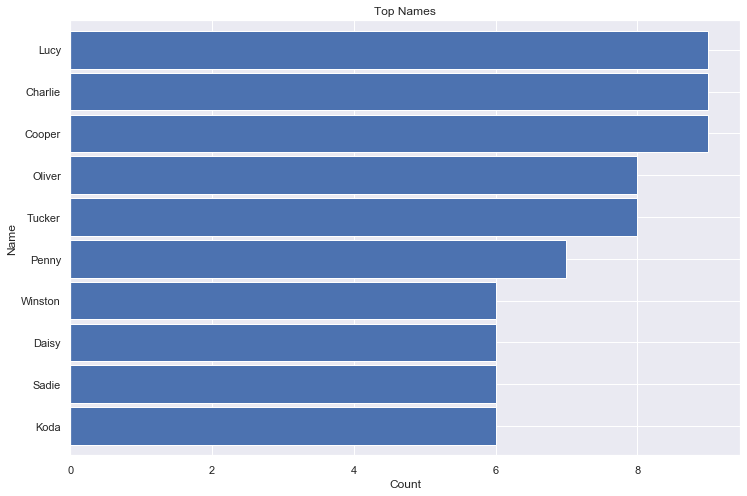

In [413]:
# Plot a bar chart to show top 10names

df_rate_dogs_temp.name.value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9)
plt.title('Top Names')
plt.ylabel('Name')
plt.xlabel('Count');

It looks like Lucy, Charlie and Cooper are the 3 most popular names.

### Is there a correlation between retweet count and favorite count?

Text(0.5, 1.0, 'Favorite vs Retweet Count')

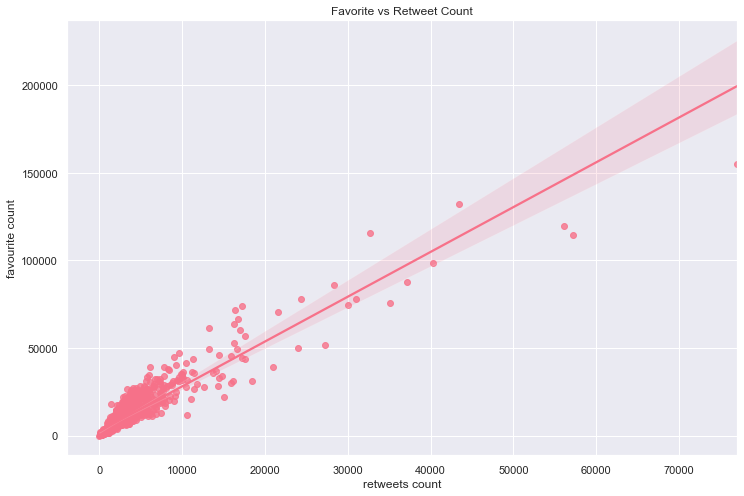

In [328]:
sns.regplot(
    x='retweets', 
    y='favorites', data=df_rate_dogs)
plt.ylabel('favourite count')
plt.xlabel('retweet count');
plt.title('Favorite vs Retweet Count')

There is a clear positive correlation between the retweets and favourites, which seems to be expected.

### Which dog type gets the most tweets?

(-1.1988699250702628,
 1.1222127171106415,
 -1.1578316605255499,
 1.1027538939335808)

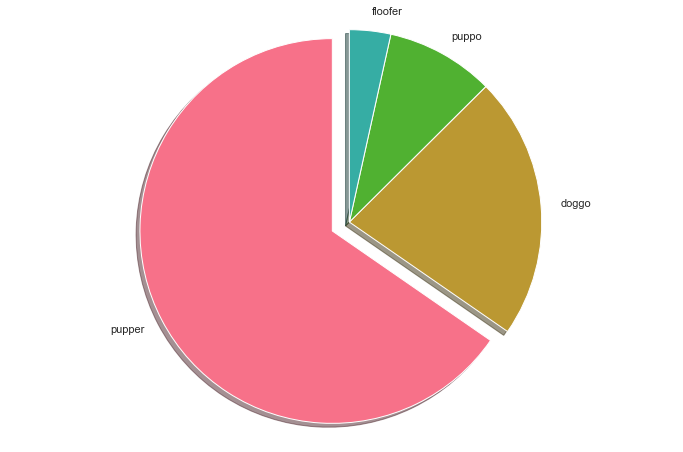

In [333]:
dog_type_count = list(df_rate_dogs[df_rate_dogs['dog_type'] != 'None']['dog_type'].value_counts())[0:4]
types = df_rate_dogs[df_rate_dogs['dog_type'] != 'None']['dog_type'].value_counts().index.tolist()[0:4]
explode = (0.1, 0, 0, 0) 

figure1, axis1 = plt.subplots()
plt.pie(dog_type_count, explode = explode, labels = types, shadow = True, startangle = 90)
plt.axis('equal')

Pupper gets more tweets which seems to be expected.

### Which prediction is more confident?

Text(0, 0.5, 'Confidence')

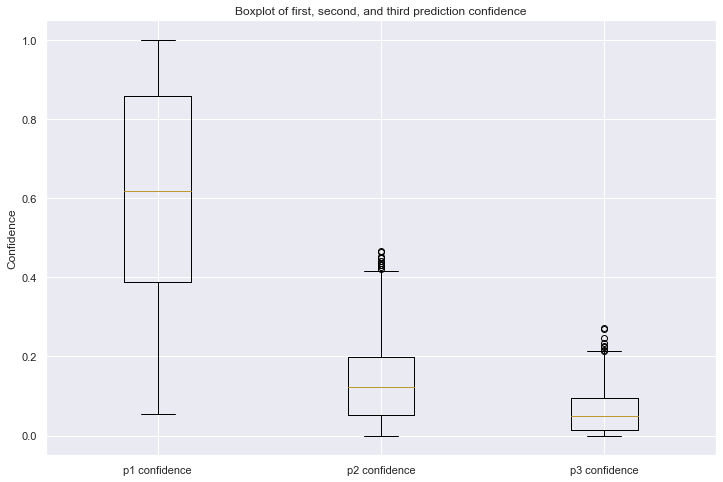

In [336]:
fig1, ax1 = plt.subplots()

plot =ax1.boxplot([
    df_rate_dogs.p1_conf[df_rate_dogs.p1_conf.notnull()],
    df_rate_dogs.p2_conf[df_rate_dogs.p2_conf.notnull()],
    df_rate_dogs.p3_conf[df_rate_dogs.p3_conf.notnull()]], 
    labels=[
    'p1 confidence', 'p2 confidence', 'p3 confidence'])
plt.title('Boxplot of first, second, and third prediction confidence')
plt.ylabel('Confidence')

The first prediction has much higher confidence than the second and third prediction.